In [17]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "andrewmvd/fetal-health-classification",
    path="fetal_health.csv"
)

print(df.head())

/tmp/ipython-input-772467599.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'fetal-health-classification' dataset.
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_varia

<Axes: xlabel='fetal_health'>

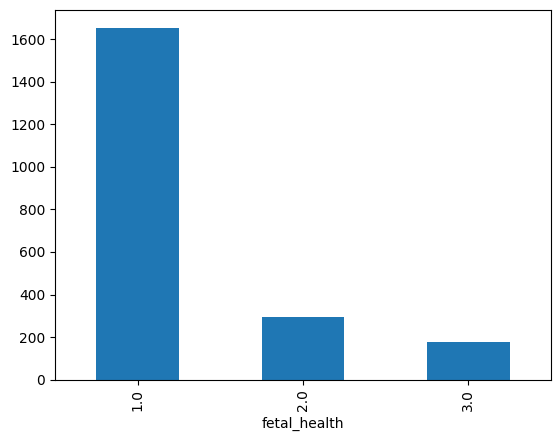

In [18]:
df["fetal_health"].value_counts().plot(kind="bar")

We can see that this dataset will need a multi-label classifier because of the three different fetal_health values.


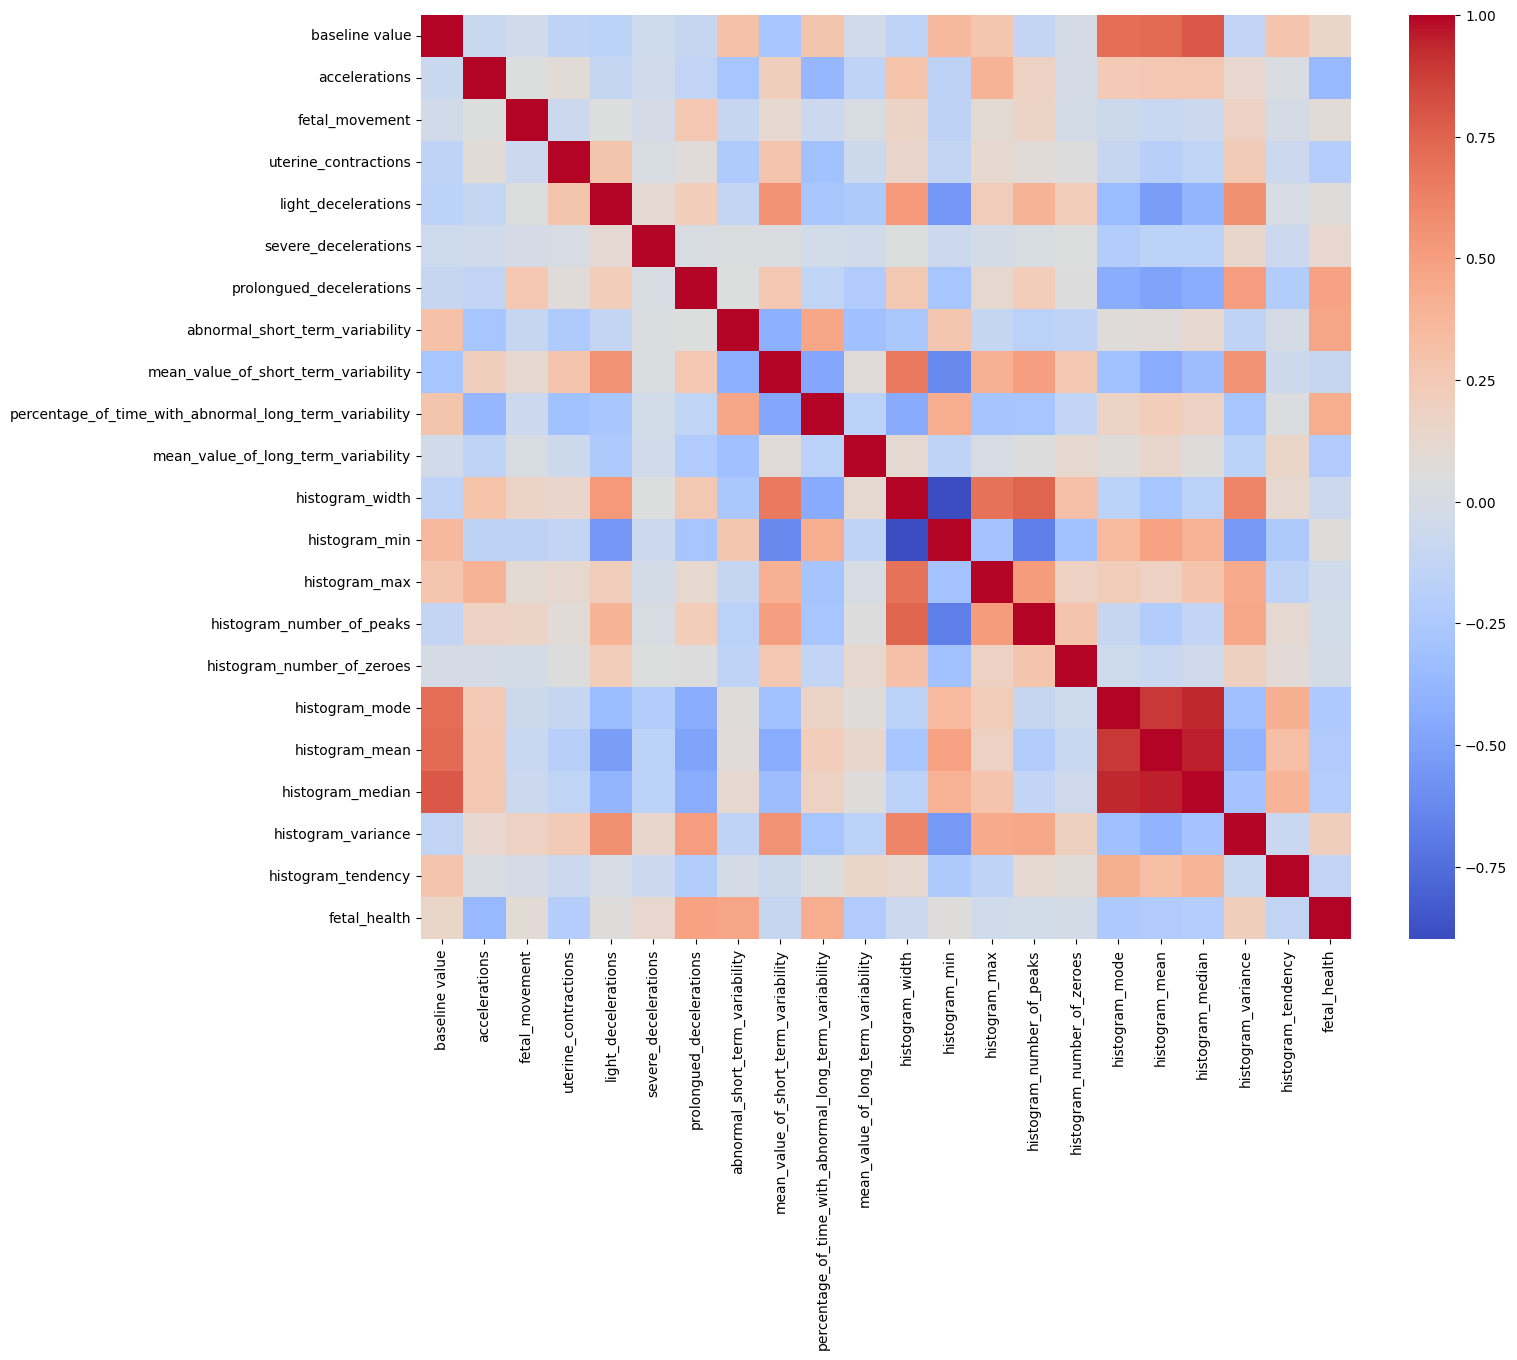

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

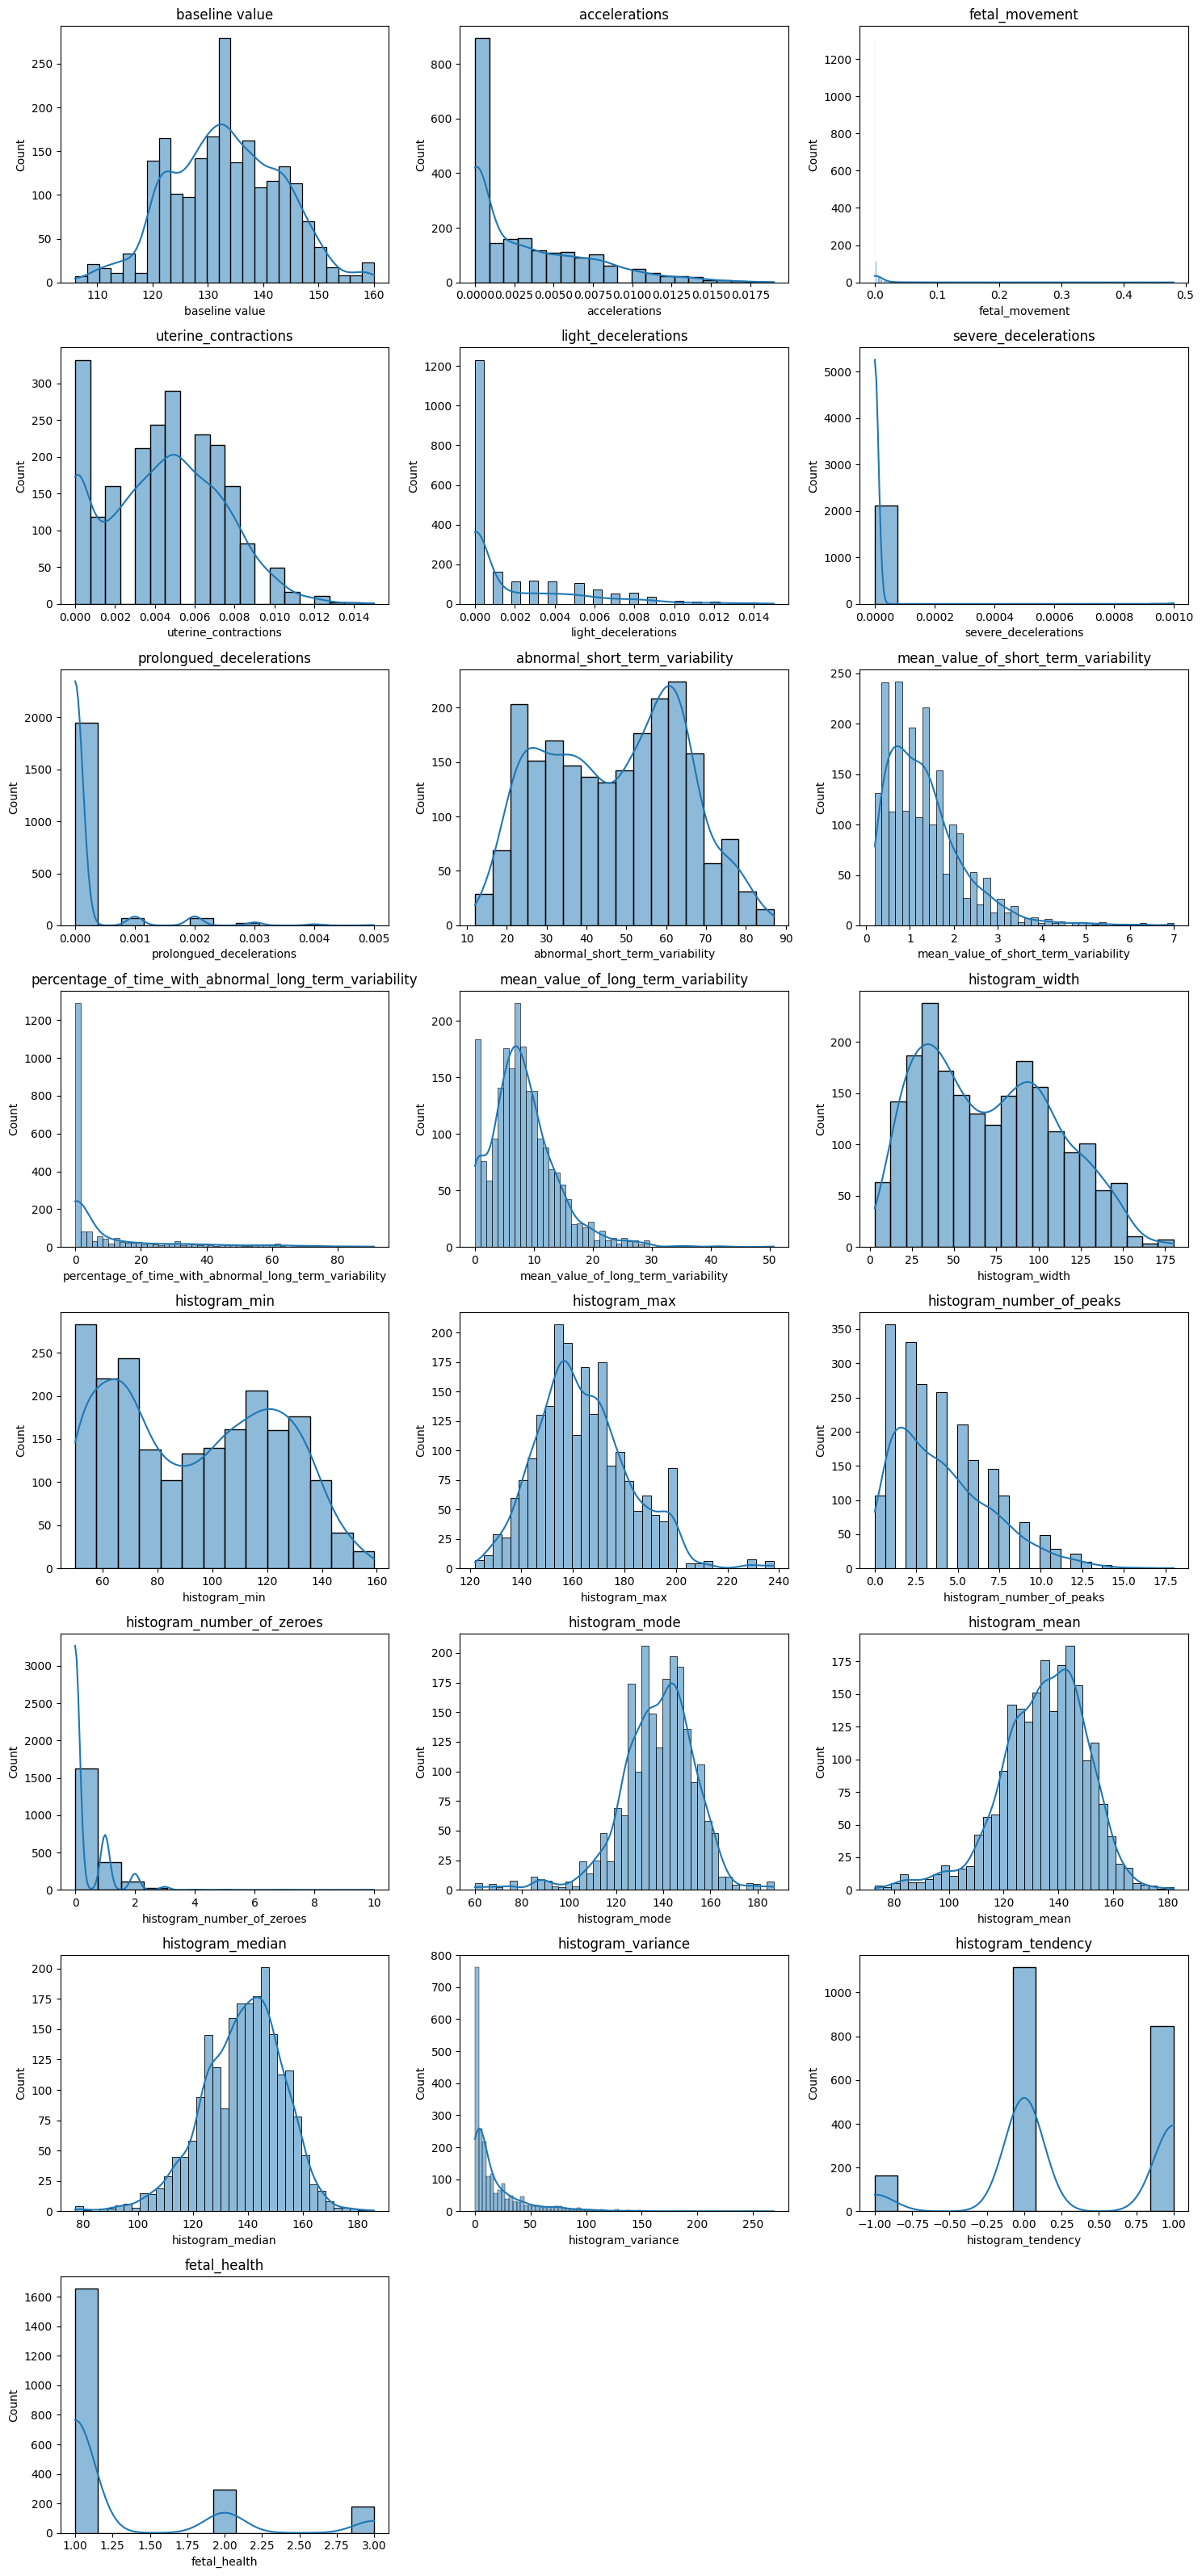

In [20]:
import matplotlib.pyplot as plt
import math

cols = df.columns
n = len(cols)

rows = math.ceil(n / 3)  # 3 graphiques par ligne
plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [22]:
df.isna().sum().sort_values(ascending=False)

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


In [23]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [24]:
X = df.copy().drop("fetal_health", axis = 1)
y = df["fetal_health"]

### Outliers !
Scaling


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

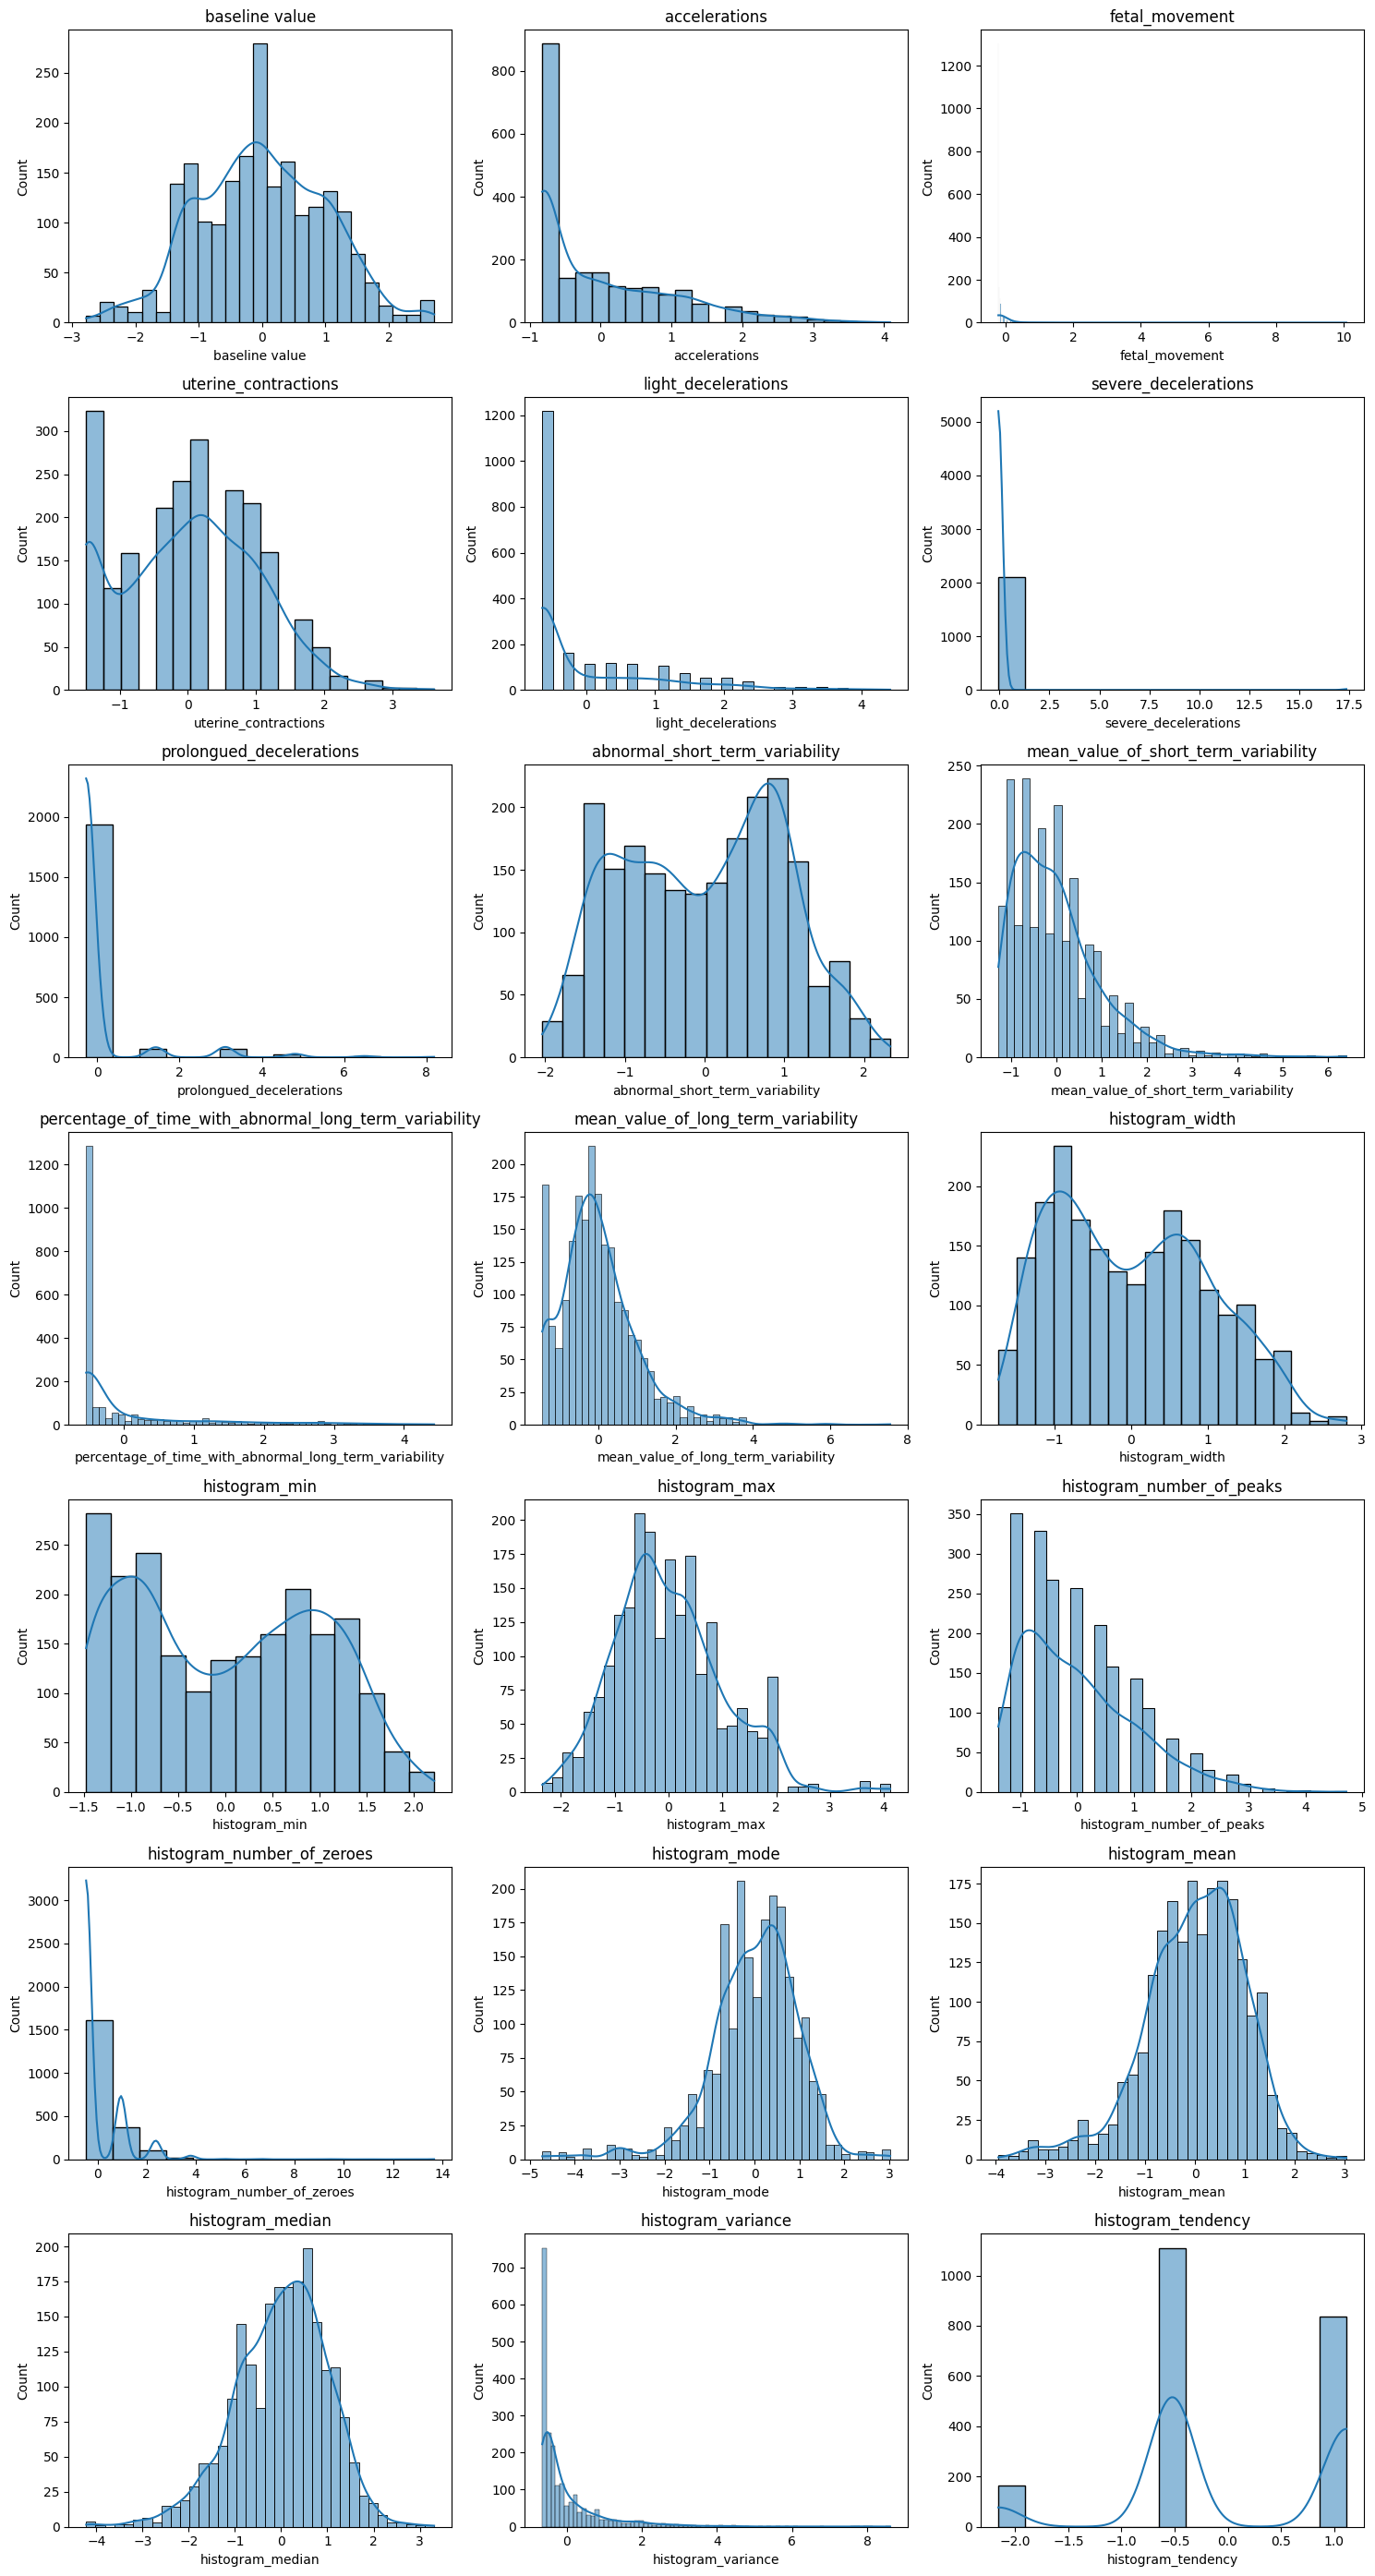

In [26]:
from collections import defaultdict
import matplotlib.pyplot as plt
import math

cols = X.columns
n = len(cols)

rows = math.ceil(n / 3)  # 3 graphiques par ligne
plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(X[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
# Split into train and test datasets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

#### Model Training
To get the best results, we are going to proceed to cross validation of multiple models whilst also fine-tuning hyperparameters using GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Hyperparameters Grid
param_grid = {
    "max_depth": [2, 5, 10],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [5, 10, 20],
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_features": ["sqrt", 0.5],
}

param_grid2 = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [2, 5, 10, 20],
    "max_features": ["sqrt", 0.5]

}

param_grd3 = {
    "C": [0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["saga", "lbfgs"]
}

param_grid4 = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
}

params = [param_grid, param_grid2, param_grd3, param_grid4]

In [42]:
models = [
          RandomForestClassifier(), #1
          GradientBoostingClassifier(), #2
          LogisticRegression(max_iter=500), #3
          KNeighborsClassifier() #4
          ]

In [ ]:
# Grid Search:
for i in range(4):
  grid_search = GridSearchCV(
      estimator = models[i],
      param_grid = params[i],
      cv = 5,
      n_jobs = -1,
      verbose = 2,
      scoring = "accuracy"
  )

  grid_search.fit(X_train, y_train)

  print("Best parameters", grid_search.best_params_)
  print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5}
Best cross-validation score: 0.9276546037562987
Fitting 5 folds for each of 256 candidates, totalling 1280 fits


In [ ]:
for i in range(4):
  y_pred = models[i].predict(X_test)
  accuracy = (y_pred == y_test).mean()
  print("Accuracy:", accuracy)